# Pytorch Workflow Libraries

https://www.learnpytorch.io/01_pytorch_workflow/

In [ ]:
Things_we_doing_here={ 1:" Data (prepare and load)",
                       2:" Build model",
                       3:" Fitting the model to data (Training)",
                       4:" Making orediction and evaluating a model",
                       5:" Saving and loading a model",
                       6:" Putting it all Together" }
Things_we_doing_here

{1: ' Data (prepare and load)',
 2: ' Build model',
 3: ' Fitting the model to data (Training)',
 4: ' Making orediction and evaluating a model',
 5: ' Saving and loading a model',
 6: ' Putting it all Together'}

In [ ]:
import torch
from torch import nn ## nn is neural networks libraries from torch
import matplotlib.pyplot as plt

torch.__version__

'2.0.1+cu118'

# Data (Preparing and Loading)

Data can be anything in the Universe
Machine Learning is Game of 2 parts
1. Get data into Numerical Representation.
2. Build a model to learn patterns in that Numerical Representation

LINEAR REGRESSION FORMULA  
1. Y= a + bX  
- X - explanatory Variable
- Y-dependant Variable
- B-slope of the line
- A is the y intercept

In [ ]:
# Create known Parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step) ## use unsqueeze to make it vertical
y = weight*X + bias

X[:10] , y[:10]

(tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
         0.1800]),
 tensor([0.3000, 0.3140, 0.3280, 0.3420, 0.3560, 0.3700, 0.3840, 0.3980, 0.4120,
         0.4260]))

In [ ]:
len(X),len(y)

(50, 50)

## Splitting data into training and test set

In [ ]:
# Creating Training and Test Set
## training - 80 percent split , test - 20 percent split
train_split= int(0.8 * len(X))
x_train,y_train=X[:train_split],y[:train_split]
## :index means upto that index values and index: means all aftr that index
x_test,y_test=X[train_split:],y[train_split:]
len(x_train) , len(x_test) , len(y_train) , len(y_test)

(40, 10, 40, 10)

In [ ]:
x_train , x_test , y_train , y_test

(tensor([0.0000, 0.0200, 0.0400, 0.0600, 0.0800, 0.1000, 0.1200, 0.1400, 0.1600,
         0.1800, 0.2000, 0.2200, 0.2400, 0.2600, 0.2800, 0.3000, 0.3200, 0.3400,
         0.3600, 0.3800, 0.4000, 0.4200, 0.4400, 0.4600, 0.4800, 0.5000, 0.5200,
         0.5400, 0.5600, 0.5800, 0.6000, 0.6200, 0.6400, 0.6600, 0.6800, 0.7000,
         0.7200, 0.7400, 0.7600, 0.7800]),
 tensor([0.8000, 0.8200, 0.8400, 0.8600, 0.8800, 0.9000, 0.9200, 0.9400, 0.9600,
         0.9800]),
 tensor([0.3000, 0.3140, 0.3280, 0.3420, 0.3560, 0.3700, 0.3840, 0.3980, 0.4120,
         0.4260, 0.4400, 0.4540, 0.4680, 0.4820, 0.4960, 0.5100, 0.5240, 0.5380,
         0.5520, 0.5660, 0.5800, 0.5940, 0.6080, 0.6220, 0.6360, 0.6500, 0.6640,
         0.6780, 0.6920, 0.7060, 0.7200, 0.7340, 0.7480, 0.7620, 0.7760, 0.7900,
         0.8040, 0.8180, 0.8320, 0.8460]),
 tensor([0.8600, 0.8740, 0.8880, 0.9020, 0.9160, 0.9300, 0.9440, 0.9580, 0.9720,
         0.9860]))

In [ ]:
# Visualizing our Data using Matplotlib

def plot_predictions(train_data=x_train,
                     train_label=y_train,
                     test_data=x_test,
                     test_label=y_test,
                     predictions=None):
 ## Plots training data and test ddata and compared prediction
  plt.figure(figsize=(10,7))

  #blue plot training data
  plt.scatter(train_data,train_label,c="b",s=4,label="Training Data")
  #Green plot test data
  plt.scatter(test_data,test_label,c="g",s=4,label="Test Data")

  #Predictions
  if predictions is not None:
    plt.scatter(test_data,predictions,c="r",s=4,label="Predictions")

  #Legend
  plt.legend(prop={"size": 14});

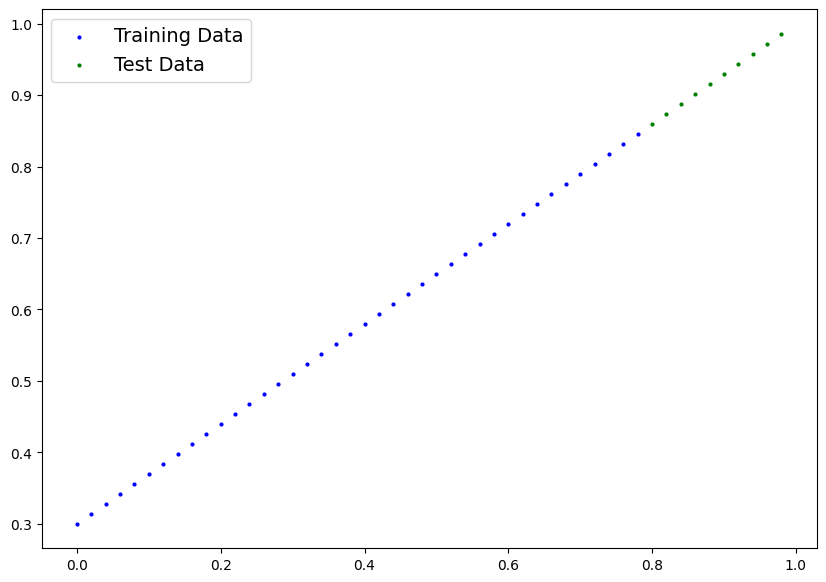

In [ ]:
plot_predictions();

## Pytorch Model Building essentials



* torch.nn - building blocks for computational grap ( neural networks are computational grpahs)
* torch.nn.paramaeter which parameter should our model try and learn . often pytch layer sets these for us
* torch.nn.Module - The base class for all netwrok modules , if we subclass it , it shld overwrite forward()
* torch.optim - this used for optimization and  , will help in gradient descent
* def forward() - all nn.module subclassse require you to overwrite forward() , defines what hepppends in forward computation

https://pytorch.org/tutorials/beginner/ptcheat.html

# Building a Model in Pytorch

THE ABOVE CODE OR CELL ( SPLITTIG ) AND THIS ARE INTER CONNECTED
What this model does ?
* Start with random values ( weight and bias )
* look at training data and adjust the random values to better represent the ideal values of weight and bias we used to create the data

How does it do ?
* Gradient Descent Algorithm
* Back Propagation Algorithm

In [ ]:
from torch import nn
# Linear Regression Model
class LinearRegressionModel(nn.Module): ## nn.module is the basic of neural networks
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,requires_grad=True, ## start with random weight and adjust it to ideal weight
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1,requires_grad=True,
                                         dtype=torch.float)) ## start with random biasn and ajust it to ideal bias

  ## Forward Method to define Computation in the model
  def forward(self,x: torch.Tensor) -> torch.Tensor: # input data is x
    return self.weights*x + self.bias # linear regression formula

In [ ]:
# Looking whats inside our Model
## Random seed
torch.manual_seed(42)

##instance of model , this is a subclass of model
model_0 =LinearRegressionModel()

list(model_0.parameters())  ## .parameter() is used to get the values inside a model

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
torch.manual_seed(42)
torch.randn(1),weight,bias

(tensor([0.3367]), 0.7, 0.3)

In [ ]:
# List the named parameter
model_0.state_dict()  ## Values and tensor names

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
## Making Predictions using Torch.inference_mode()
## lets see how it predicts y test using x test
with torch.inference_mode():  # iNFERENCE IS JUST PREDICTIONS but without add backwards grad function
  y_preds=model_0(x_test)

y_preds ## not implemented shows not implemented error

tensor([0.3982, 0.4049, 0.4116, 0.4184, 0.4251, 0.4318, 0.4386, 0.4453, 0.4520,
        0.4588])

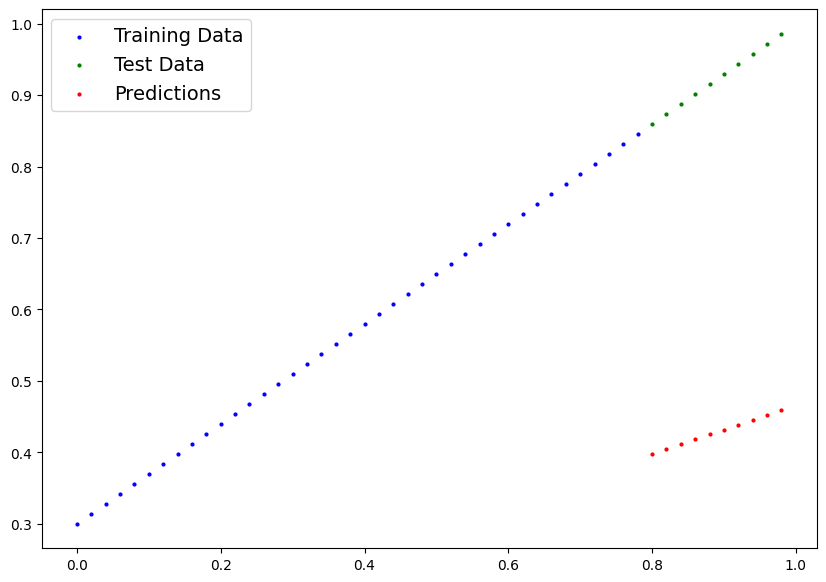

In [ ]:
plot_predictions(predictions=y_preds)

SOO THE ABOVE MODEL ISNTT GOODOD...CAZ RED DOTS AINT MATCHING

# Training and Testing a Model

One way to measure how poor or how wrong our models predictions are to use a loss function

Things we need to train

**loss function** = A function to measure how wrong model values are
**Optimizer** = Tkes the loss and adjust the parameters values according to Loss

We need
1. Training loop
2. Testing Loop

In [ ]:
list(model_0.parameters()),model_0.state_dict()
## TEHRE ARE MANY MODELS OF LOSS AND OPTIMIZERS , CHOOSE ACCORDING TO DATA AND QUESTION

([Parameter containing:
  tensor([0.3367], requires_grad=True),
  Parameter containing:
  tensor([0.1288], requires_grad=True)],
 OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))]))

In [ ]:
# Setting up a loss function
loss_fn=nn.L1Loss()
loss_fn

L1Loss()

:Regression Problem requires nn.L1Loss() and torch.optim.SGD

In [ ]:
# Setting up an Optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.01) #lr - learning rate
## lr is the most important learning hyperparameter
## larget learning rate -> larger chagnge in parameter

##Training loop
0. Loop through the data
1. Forward pass to make predictions ( forward propgation )
2. Calculate the loss ( compare predictions to ground truth data)
3. Optimizer zero grad
4. Loss Backward - move backwards through network to calculate gradients of each parameters of our model
5. Optimizer step - Use optimiset to improve loss by taking the loss data

In [ ]:
x_test , y_test

(tensor([0.8000, 0.8200, 0.8400, 0.8600, 0.8800, 0.9000, 0.9200, 0.9400, 0.9600,
         0.9800]),
 tensor([0.8600, 0.8740, 0.8880, 0.9020, 0.9160, 0.9300, 0.9440, 0.9580, 0.9720,
         0.9860]))

In [ ]:
with torch.inference_mode():
  list(model_0.eval().parameters())

In [ ]:
torch.manual_seed(42)

# an epoch is one loop through all the data
epoch = 100
epoch_count=[]
loss_values=[]
test_loss_values=[]

# 0. Loop through the data
for epoch in range(epoch):
  model_0.train()
  #1.Forward Pass
  y_pred=model_0(x_train)
  #2.Loss Calculation
  loss = loss_fn(y_pred,y_train)
  print("Loss:", {loss} )
  #3.optimizer
  optimizer.zero_grad()
  #4 Perform Back Propagation
  loss.backward()
  #5 Step the Optimizer
  optimizer.step() # how optimizer changes will accumulate throug the loop so we have to zero them above to make it ready for next loop


  ## Testing the model using model_0.eval()
  model_0.eval() ## turns of diff settings not needed in model

  with torch.inference_mode():
    test_pred=model_0(x_test)
    test_loss=loss_fn(test_pred,y_test)

  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} Loss: {loss} Test Loss: {test_loss}")
    print(model_0.state_dict())
with torch.inference_mode():
  y_preds_new=model_0(x_test)

Loss: {tensor(0.3129, grad_fn=<MeanBackward0>)}
Epoch: 0 Loss: 0.31288138031959534 Test Loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Loss: {tensor(0.3014, grad_fn=<MeanBackward0>)}
Loss: {tensor(0.2898, grad_fn=<MeanBackward0>)}
Loss: {tensor(0.2783, grad_fn=<MeanBackward0>)}
Loss: {tensor(0.2668, grad_fn=<MeanBackward0>)}
Loss: {tensor(0.2553, grad_fn=<MeanBackward0>)}
Loss: {tensor(0.2438, grad_fn=<MeanBackward0>)}
Loss: {tensor(0.2322, grad_fn=<MeanBackward0>)}
Loss: {tensor(0.2207, grad_fn=<MeanBackward0>)}
Loss: {tensor(0.2092, grad_fn=<MeanBackward0>)}
Loss: {tensor(0.1977, grad_fn=<MeanBackward0>)}
Epoch: 10 Loss: 0.1976713240146637 Test Loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Loss: {tensor(0.1862, grad_fn=<MeanBackward0>)}
Loss: {tensor(0.1746, grad_fn=<MeanBackward0>)}
Loss: {tensor(0.1631, grad_fn=<MeanBackward0>)}
Loss: {tensor(0.1516, grad_fn=<MeanBackward0>)}
Los

In [ ]:
epoch_count,loss_values,test_loss_values

([0, 10, 20, 30, 40, 50, 60, 70, 80, 90],
 [tensor(0.3129, grad_fn=<MeanBackward0>),
  tensor(0.1977, grad_fn=<MeanBackward0>),
  tensor(0.0891, grad_fn=<MeanBackward0>),
  tensor(0.0531, grad_fn=<MeanBackward0>),
  tensor(0.0454, grad_fn=<MeanBackward0>),
  tensor(0.0417, grad_fn=<MeanBackward0>),
  tensor(0.0382, grad_fn=<MeanBackward0>),
  tensor(0.0348, grad_fn=<MeanBackward0>),
  tensor(0.0313, grad_fn=<MeanBackward0>),
  tensor(0.0279, grad_fn=<MeanBackward0>)],
 [tensor(0.4811),
  tensor(0.3464),
  tensor(0.2173),
  tensor(0.1446),
  tensor(0.1136),
  tensor(0.0992),
  tensor(0.0889),
  tensor(0.0806),
  tensor(0.0723),
  tensor(0.0647)])

In [ ]:
import numpy as np
np.array(torch.tensor(loss_values).numpy()),test_loss_values

(array([0.31288138, 0.19767132, 0.08908726, 0.05314853, 0.04543797,
        0.04167863, 0.03818933, 0.0347609 , 0.03132383, 0.0278874 ],
       dtype=float32),
 [tensor(0.4811),
  tensor(0.3464),
  tensor(0.2173),
  tensor(0.1446),
  tensor(0.1136),
  tensor(0.0992),
  tensor(0.0889),
  tensor(0.0806),
  tensor(0.0723),
  tensor(0.0647)])

Text(0.5, 0, 'Epochs')

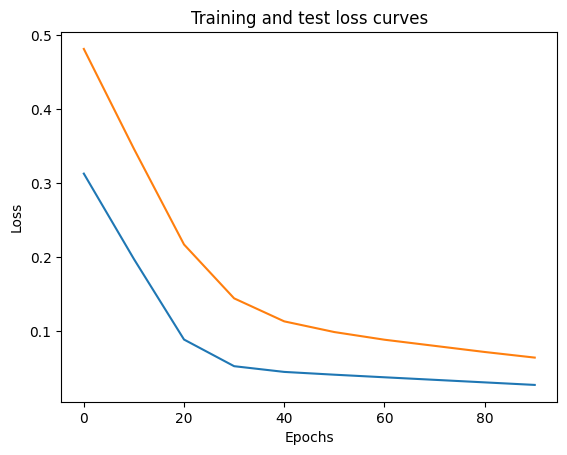

In [ ]:
plt.plot(epoch_count,np.array(torch.tensor(loss_values).numpy()),label="Train loss")
plt.plot(epoch_count,test_loss_values,label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")

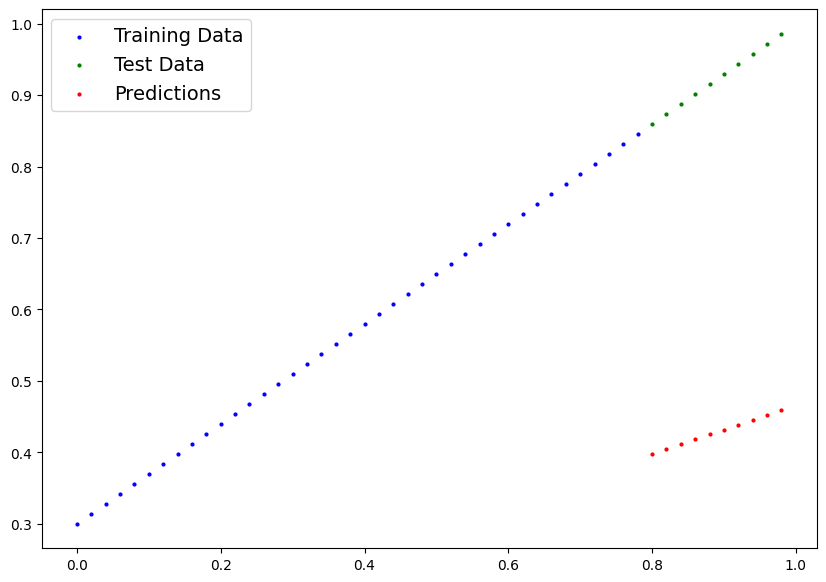

In [ ]:
plot_predictions(predictions=y_preds)

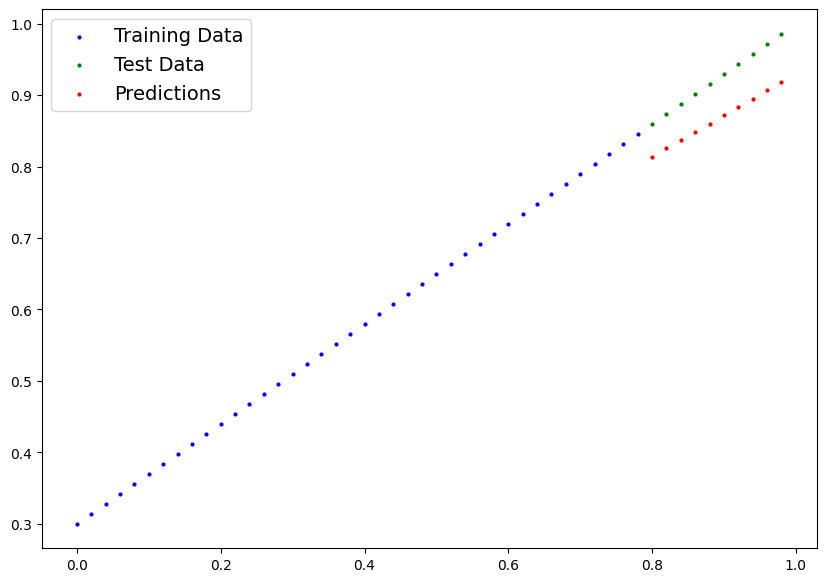

In [ ]:
plot_predictions(predictions=y_preds_new)

#Saving a Model

In [ ]:
# Saving a Pytorch Model
from pathlib import Path

#Create Model Directory
Model_Path=Path("Models")
Model_Path.mkdir(parents=True,exist_ok=True)

#Model Save Path
Model_name= "01_pytorch_workflow_model_0.pth"
modelsavepath=Model_Path/ Model_name
print(f"Saving Model to : {modelsavepath}")
torch.save(obj=model_0.state_dict(),
           f=modelsavepath)

Saving Model to : Models/01_pytorch_workflow_model_0.pth


In [ ]:
ls -1 Models

01_pytorch_workflow_model_0.pth


In [ ]:
torch.load(f=modelsavepath)

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

In [ ]:
loaded_model_0=LinearRegressionModel()
loaded_model_0.load_state_dict(torch.load(f=modelsavepath))

<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

In [ ]:
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_pred=loaded_model_0(x_test)
loaded_model_pred

tensor([0.8141, 0.8256, 0.8372, 0.8488, 0.8603, 0.8719, 0.8835, 0.8950, 0.9066,
        0.9182])

In [ ]:
model_0.eval()
with torch.inference_mode():
  y_preds=model_0(x_test)
y_preds==loaded_model_pred

tensor([True, True, True, True, True, True, True, True, True, True])

# Doing it all Again all at once

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800]])
x test values : tensor([[0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])
y test values : tensor([[1.0400],
        [1.0560],
        [1.0720],
        [1.0880],
        [1.1040],
        [1.1200],
        [1.1360],
        [1.1520],
        [1.1680],
        [1.1840]])
40 40 10 10


(LinearRegressionModel2(
   (layer1): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('layer1.weight', tensor([[0.7645]])),
              ('layer1.bias', tensor([0.8300]))]))

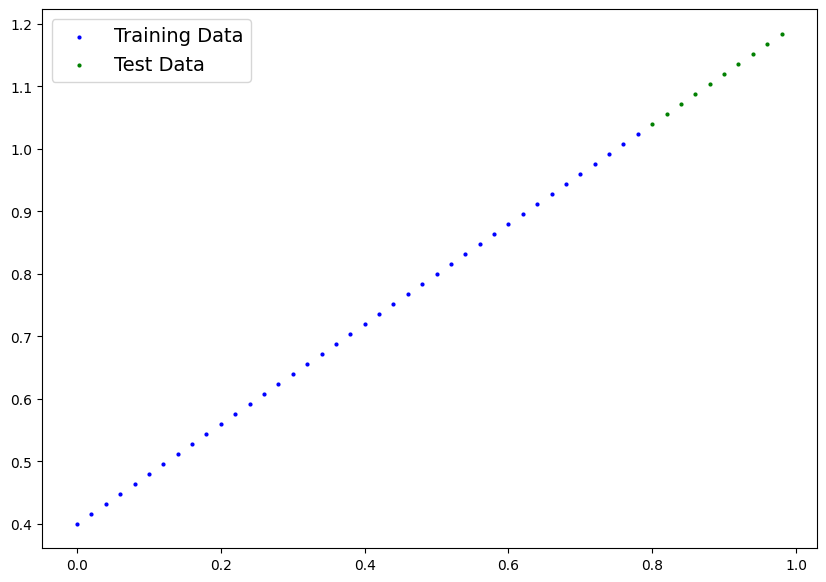

In [ ]:
## LINEAR REGRESSION MODEL
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

torch.__version__
device= "cuda" if torch.cuda.is_available() else "cpu"
#1. Building Datasets

## Creating data for Linear regression Formula
weight = 0.8
bias = 0.4
## Creating the range values
start = 0
end = 1
step = 0.02
## Creating X and Y features
X=torch.arange(start,end,step).unsqueeze(dim=1)   # Without unsqeeze errors come
y=weight*X+bias
print(X[:10])
##Splitting the data
split_index= int(0.8*len(X))
x_train,y_train=X[:split_index],y[:split_index]
### print(f"x train values : {x_train}")
### print(f"x train values : {y_train}")
x_test,y_test=X[split_index:],y[split_index:]
print(f"x test values : {x_test}")
print(f"y test values : {y_test}")
print(len(x_train),len(y_train),len(x_test),len(y_test))
## Graph making Function
def graph_maker(train_data=x_train,
                     train_label=y_train,
                     test_data=x_test,
                     test_label=y_test,
                     prediction=None):
 ## Plots training data and test data and compared prediction
  plt.figure(figsize=(10,7))

  #blue plot training data
  plt.scatter(train_data,train_label,c="b",s=4,label="Training Data")
  #Green plot test data
  plt.scatter(test_data,test_label,c="g",s=4,label="Test Data")

  #Predictions
  if prediction is not None:
    plt.scatter(test_data,prediction,c="r",s=4,label="Predictions")

  #Legend
  plt.legend(prop={"size": 14});

## PLotting the graph using above function
graph_maker(x_train,y_train,x_test,y_test)

#2. Building a Model linear subclassing nn.module
class LinearRegressionModel2(nn.Module):
  def __init__(self):
    super().__init__()
    ## Using nn.Linear instead of creating self.weight using torch.randn
    self.layer1=nn.Linear(in_features=1,out_features=1)
  def forward(self,x: torch.Tensor) -> torch.Tensor:
    return self.layer1(x)
# Set Manual Seed
torch.manual_seed(42)
#Making a Model
model1= LinearRegressionModel2()
model1 , model1.state_dict()

In [ ]:
#3. Inputting our data and Training it
model1.state_dict()
## loss function
lossfn=nn.L1Loss()
## OPTIMIZER
optimizer = torch.optim.SGD(params=model1.parameters(),lr=0.01)
## Training Loop
torch.manual_seed(42)

epoch=200
for epoch in range(epoch):
  # Training loop
  model1.train()
  # 1. Forward pass
  y_pred=model1(x_train)
  # 2. loss calculation
  loss = lossfn(y_pred,y_train)
  # 3. Optimizer zero making
  optimizer.zero_grad()
  # 4. Back Propagation
  loss.backward()
  # 5. Optimizer Step
  optimizer.step()

  #4. Testing or Evaluating the Model
  ##Testing Loop
  model1.eval()
  with torch.inference_mode():
    test_pred=model1(x_test)
    test_loss=lossfn(test_pred,y_test)
  if epoch % 10 == 0:
    print(f"Epoch:{epoch} | Loss : {loss} | Test loss : {test_loss}")

Epoch:0 | Loss : 0.4161779284477234 | Test loss : 0.38497620820999146
Epoch:10 | Loss : 0.30096808075904846 | Test loss : 0.2502663731575012
Epoch:20 | Loss : 0.18575818836688995 | Test loss : 0.11555655300617218
Epoch:30 | Loss : 0.07054831087589264 | Test loss : 0.019153285771608353
Epoch:40 | Loss : 0.03352728486061096 | Test loss : 0.06804587692022324
Epoch:50 | Loss : 0.029530202969908714 | Test loss : 0.06738262623548508
Epoch:60 | Loss : 0.026068534702062607 | Test loss : 0.06048385053873062
Epoch:70 | Loss : 0.022640090435743332 | Test loss : 0.05221130698919296
Epoch:80 | Loss : 0.019201401621103287 | Test loss : 0.0439387783408165
Epoch:90 | Loss : 0.015766603872179985 | Test loss : 0.03635308891534805
Epoch:100 | Loss : 0.012336590327322483 | Test loss : 0.02808058261871338
Epoch:110 | Loss : 0.008897785097360611 | Test loss : 0.019808029755949974
Epoch:120 | Loss : 0.005464674439281225 | Test loss : 0.012222373858094215
Epoch:130 | Loss : 0.0020361326169222593 | Test loss :

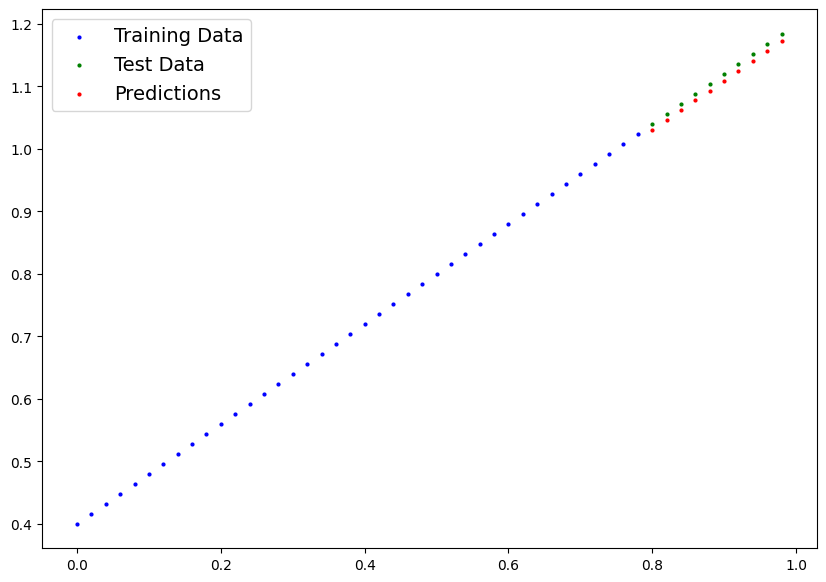

In [ ]:
model1.eval()

#Make Predictions on test data
with torch.inference_mode():
  y_preds=model1(x_test)
y_preds
# Visuaalizing after Training
graph_maker(prediction=y_preds)

In [ ]:
# Saving the above Model
from pathlib import Path
model_path=Path("Models")
model_path.mkdir(parents=True,exist_ok=True)

#model save path
model_name="01pytorch_workflow_model_1.pth"
model_save_path= model_path/model_name
model_save_path

#save model dict
print(f"Saving model to : {model_save_path}")
torch.save(obj=model1.state_dict(),f=model_save_path)

Saving model to : Models/01pytorch_workflow_model_1.pth


In [ ]:
#loading a model
loaded_model1=LinearRegressionModel2()

# loading it
loaded_model1.load_state_dict(torch.load(model_save_path))
#


<All keys matched successfully>

In [ ]:
loaded_model1.state_dict()

OrderedDict([('layer1.weight', tensor([[0.7922]])),
             ('layer1.bias', tensor([0.3960]))])

In [ ]:
loaded_model1.eval()
with torch.inference_mode():
  loaded_model1_preds=loaded_model1(x_test)
y_preds == loaded_model1_preds


tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])